In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
import os
base_path = '../../'
sys.path.append(base_path)

In [3]:
from src.pyvista_flow_field_dataset import PyvistaFlowFieldDataset
ds_pv = PyvistaFlowFieldDataset.load_from_huggingface(num_samples=3)

Found 333 files in repository 'peteole/CoolMucSmall'.
File 1/6: volume_design_1.cgns already exists. Skipping download.
File 2/6: volume_design_10.cgns already exists. Skipping download.
File 3/6: volume_design_1001.cgns already exists. Skipping download.
File 4/6: surface_design_1.cgns already exists. Skipping download.
File 5/6: surface_design_10.cgns already exists. Skipping download.
File 6/6: surface_design_1001.cgns already exists. Skipping download.
All files have been downloaded to 'datasets/ds_huggingface'.


In [4]:
volume_pv = ds_pv[0].volume_data[0][0][0]
volume_pv

2025-03-23 11:36:50.096 (   3.451s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639a406f2d0): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-03-23 11:36:50.097 (   3.452s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639a406f2d0): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-03-23 11:36:50.097 (   3.452s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639a406f2d0): Skipping BC_t node: BC_t type 'BCTunnelOutflow' not supported yet.


UnstructuredGrid (0x7f6e8011d0c0)
  N Cells:    151598
  N Points:   166546
  X Bounds:   0.000e+00, 4.000e-01
  Y Bounds:   -6.558e-02, 3.442e-02
  Z Bounds:   0.000e+00, 2.000e-02
  N Arrays:   11

In [5]:
import numpy as np
import pyvista as pv

In [6]:
nx,ny,nz = 100,50,20
x, y, z = np.mgrid[0:0.4:complex(nx), 
                    -0.1:0.1:complex(ny), 
                    0:0.02:complex(nz)]
grid = pv.StructuredGrid(x, y, z)
interpolated_grid = grid.sample(volume_pv)

In [7]:
interpolated_grid

StructuredGrid (0x7f6e8011d120)
  N Cells:      92169
  N Points:     100000
  X Bounds:     0.000e+00, 4.000e-01
  Y Bounds:     -1.000e-01, 1.000e-01
  Z Bounds:     0.000e+00, 2.000e-02
  Dimensions:   100, 50, 20
  N Arrays:     12

In [8]:
interpolated_grid.plot(scalars='Pressure')

Widget(value='<iframe src="http://localhost:37243/index.html?ui=P_0x7f6e8015e5d0_0&reconnect=auto" class="pyvi…

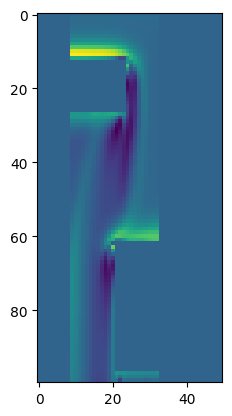

In [9]:
import matplotlib.pyplot as plt
data=interpolated_grid['Velocity'].reshape((nx,ny,nz,3), order='F')
plt.imshow(data[:,:,5,2])
plt.show()

In [10]:
volume_pv.plot(scalars='Pressure')

Widget(value='<iframe src="http://localhost:37243/index.html?ui=P_0x7f6e79d793d0_1&reconnect=auto" class="pyvi…

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers). Got range [-1.7214126586914062..3.147486686706543].


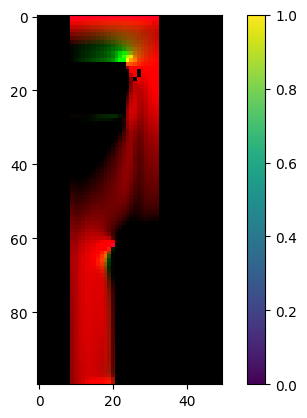

In [11]:
plt.imshow(data[:,:,0])
plt.colorbar()
plt.show()

In [12]:
data[:,:,0].min()

np.float64(-1.7214126586914062)

In [13]:
# check for nans
np.isnan(data).sum()

np.int64(0)

In [14]:
interpolated_grid['Pressure'][:nx]

pyvista_ndarray([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
                 0., 0.])

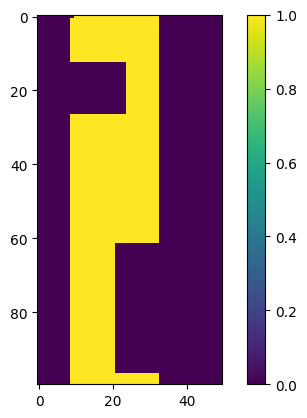

In [15]:

mask=interpolated_grid['vtkValidPointMask'].reshape(nx,ny,nz, order='F')
plt.imshow(mask[:,:,5])
plt.colorbar()
plt.show()

In [16]:
ds_pv.get_bounds()

2025-03-23 11:37:01.064 (  14.419s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639ac14b880): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-03-23 11:37:01.065 (  14.419s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639ac14b880): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-03-23 11:37:01.065 (  14.420s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639ac14b880): Skipping BC_t node: BC_t type 'BCTunnelOutflow' not supported yet.
2025-03-23 11:37:01.342 (  14.697s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639aa34c4b0): Skipping BC_t node: BC_t type 'BCInflow' not supported yet.
2025-03-23 11:37:01.342 (  14.697s) [    7F6EC350C740]      vtkCGNSReader.cxx:4268  WARN| vtkCGNSReader (0x5639aa34c4b0): Skipping BC_t node: BC_t type 'BCSymmetryPlane' not supported yet.
2025-03-23 11:37:01.342 (  14.697s) [    7F6EC350C740]      vtkCGNSRe

(0.0,
 0.40000000000000013,
 -0.06557989546912942,
 0.034420104530870646,
 0.0,
 0.020000000000000007)

In [32]:
from src.voxel_flow_field_dataset import VoxelFlowFieldDataset
ds_voxel = VoxelFlowFieldDataset('datasets/voxels',ds_pv,resolution=(50,20,10))

In [ ]:
ds_voxel[0].mask

MemoryMappedTensor([[[[ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00],
                      [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00],
                      [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00],
                      ...,
                      [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00],
                      [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00],
                      [ 0.0000e+00,  0.0000e+00,  0.0000e+00,  0.0000e+00,
                        0.0000e+00]],

                     [[ 3.1450e+00,  2.9578e-03,  1.5024e-01,  2.8392e+01,
                        2.9315e+02],
                      [ 3.9569e+00,  2.9790e-03,  3.9975e-02,  2.7720e+01,
                        2.9315e+02],
                      [ 3.9445e+00,  3.0000e-03,  1.7110e-02,  2.7519e+01,
